## **<span style="color:purple">k-최근접 이웃 회귀</span>**
---
- 지도 학습 알고리즘은 크게 분류와 회귀로 나뉨
- 회귀: 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제, 두 변수 사이의 상관관계를 분석하는 방법\

In [1]:
# 데이터 준비
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

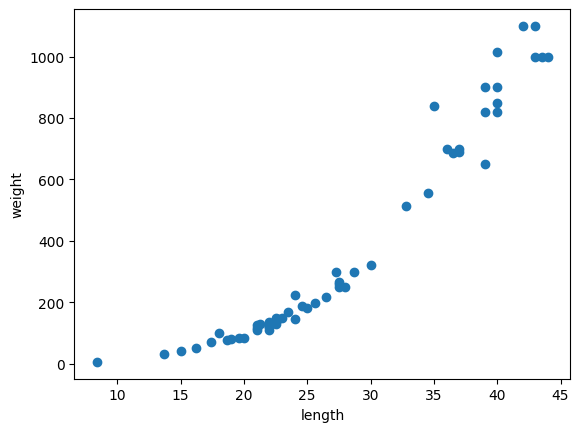

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

In [4]:
train_input=train_input.reshape(-1,1) # reshape의 -1은 나머지 원소 개수로 모두 채우겠다는 의미임
test_input=test_input.reshape(-1,1) # (14,1)도 똑같은 값임
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

knr.fit(train_input,train_target)

print(knr.score(test_input,test_target)) # 이건 결정계수임 <-> 정확도

0.992809406101064


#### **결정 계수(R^2)**
- 결정계수: $ 1-(sum((타깃-예측)^2)/sum((타깃-평균)^2)$
- 타깃의 평균 정도를 예측하는 수준이라면 결정 계수는 0에 가까워지고, 예측이 타깃에 가가워지면 결정 계수가 1에 가까워진다

In [6]:
# 결정 계수말고 다른 값으로 직접 모델이 얼마나 좋은지 이해해보기
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듬
test_prediction=knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
mae=mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


#### **과대 적합 VS 과소 적합**
- 과대 적합: 훈련 세트에서 점수가 굉장히 좋았지만, 테스트 세트에서는 점수가 굉장히 나쁜 경우
- 과소 적합: 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우   
    - 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우   
    - 훈련 세트가 전체 데이터를 대표하지 못한 경우  
    - 훈련 세트와 테스트 세트의 크기가 매우 작은 경우  
    - k-최근접 이웃 알고리즘에서 k를 낮추는 방식으로 해결할 수 있음. 이는 국지적인 패턴에 민감해지도록 하기 위함

In [7]:
print(knr.score(train_input,train_target))

0.9698823289099254


In [8]:
knr.n_neighbors=3

knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.9746459963987609


## **<span style="color:purple">선형 회귀</span>**
---

#### **k-최근접 이웃의 한계**
- 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있음

In [9]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [10]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)

In [11]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input,train_target)

print(knr.predict([[50]]))

[1033.33333333]


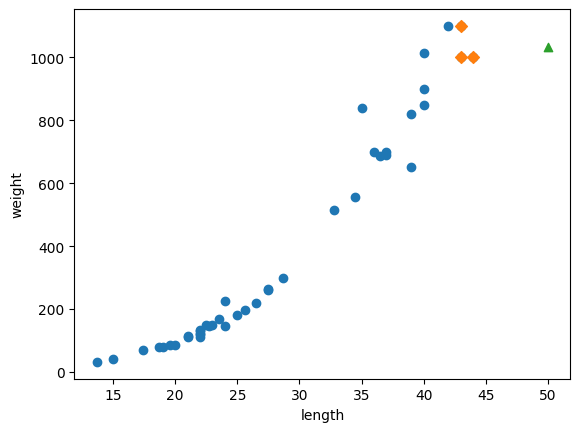

In [13]:
import matplotlib.pyplot as plt
distances,indexes=knr.kneighbors([[50]])

plt.scatter(train_input,train_target)

plt.scatter(train_input[indexes],train_target[indexes],marker="D")

plt.scatter(50,1033,marker="^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [14]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [15]:
print(knr.predict([[100]]))

[1033.33333333]


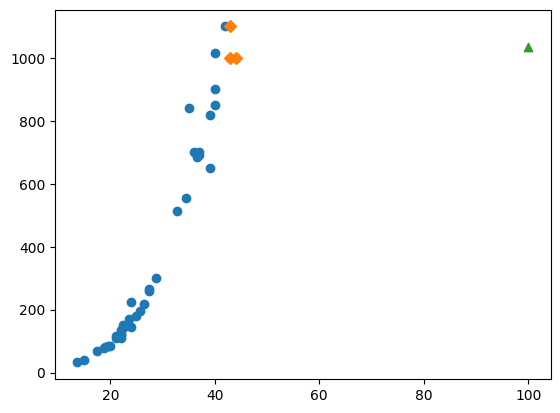

In [16]:
# 100cm 농어의 이웃
distances,indexes=knr.kneighbors([[100]])

plt.scatter(train_input,train_target)

plt.scatter(train_input[indexes],train_target[indexes],marker="D")

plt.scatter(100,knr.predict([[100]]),marker="^")
plt.show()

#### **선형 회귀**

In [17]:
# 선형 회귀
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(train_input,train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [18]:
print(lr.coef_,lr.intercept_) # coef_와 intercept_ 속성은 기울기(각 항의 계수)와 y절편을 뜻함

[39.01714496] -709.0186449535474


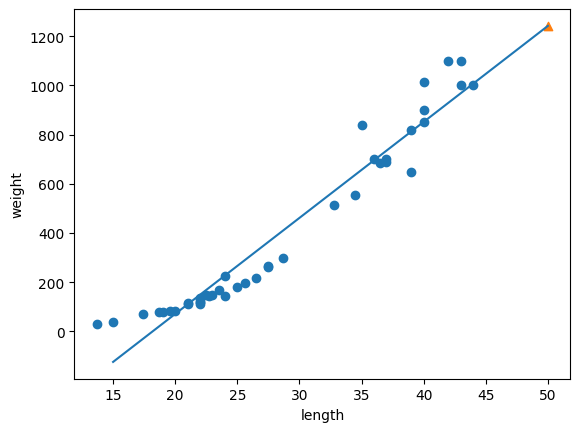

In [19]:
plt.scatter(train_input,train_target)

plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

plt.scatter(50,1241.8,marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [20]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9398463339976041
0.824750312331356


#### **다항 회귀**
- 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 함

In [21]:
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [22]:
lr=LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [23]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


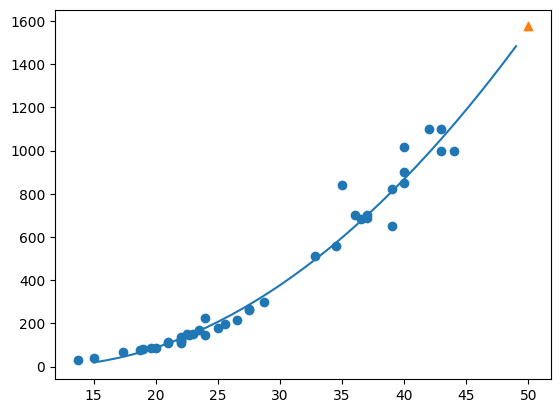

In [24]:
point=np.arange(15,50)

plt.scatter(train_input,train_target)

plt.plot(point,1.01*point**2-21.6*point+116.05)

plt.scatter(50,1574,marker="^")
plt.show()

In [25]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


## **<span style="color:purple">특성 공학과 규제</span>**
---

#### **다중 회귀**
- 다중 회귀: 여러 개의 특성을 사용한 선형 회귀 -> 직선이 아닌 평면으로 학습
- 특성 공학: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [26]:
import pandas as pd
df=pd.read_csv("perch_full.csv")
perch_full=df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [27]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [28]:
train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
# polynomialfeatures 클래스는 변환기로서, 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가함
poly=PolynomialFeatures(include_bias=False) # include_bias는 선형 방정식의 절편에 1인 특성이 곱해지는 계수라고 볼 수 있음

poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [30]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [31]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [32]:
test_poly=poly.transform(test_input)

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9903183436982124
0.9714559911594145


In [34]:
poly=PolynomialFeatures(degree=5,include_bias=False) # bias 매개변수는 고차항의 최대 차수를 지정함
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [35]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target)) # 과대 적합 됨

0.9999999999996176
-144.40585108215134


#### **규제**
- 규제: 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것-> 과대적합 방지, 선형 회귀의 계수의 크기를 작게 만듬
- 릿지: 계수를 제곱한 값을 기준으로 규제를 적용, alpha 값이 클 수록 규제 강도가 세짐
- 라쏘: 계수의 절댓값을 기준으로 규제를 적용

In [36]:
# 정규화하기
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

In [37]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896101671037343
0.9790693977615379


In [38]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

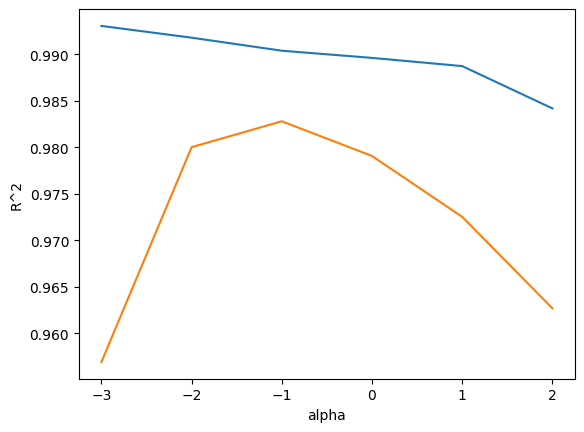

In [39]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

In [40]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570368
0.9827976465386983


In [41]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.989789897208096
0.9800593698421884


In [42]:
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso=Lasso(alpha=alpha,max_iter=10000)
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

C:\Users\82106\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\82106\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


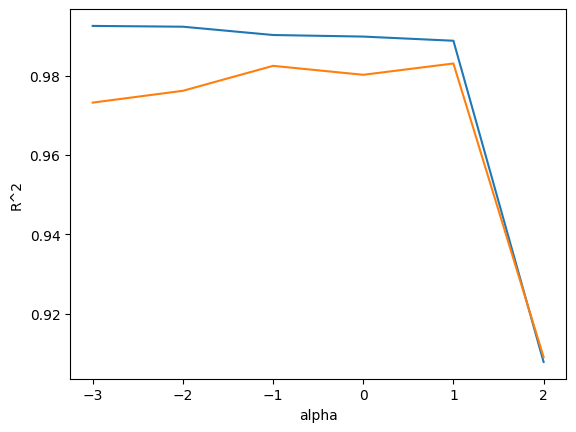

In [43]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

In [44]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [45]:
print(np.sum(lasso.coef_==0))

40
